# 의사결정나무

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 풍속을 threshol값을 기준으로 분류하는 의사결정나무

# 풍속에 따른 항공지연 데이터 생성
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']
data = pd.DataFrame({'풍속':Wind, '지연 여부':Delay})

# 함수 정의
def binary_tree(data,threshold):
    # 변수 초기화
    yes = []
    no = []
    
    # data의 모든 풍속 값에 대해 반복
    for wind in data['풍속']:
        # threshold값과 비교해 분류 저장
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
    # 결과를 데이터프레임으로 저장
    df_yes = pd.DataFrame({'풍속':yes, '예상 지연 여부':['Yes']*len(yes)})
    df_no = pd.DataFrame({'풍속':no, '예상 지연 여부':['No']*len(no)})
    # 반환값(df_no와 df_yes를 세로방향으로 결합) 설정
    return df_no.append(df_yes, ignore_index=True)

In [7]:
# binary_tree 모델을 사용하여 항공 지연 여부를 예측

data_pred = binary_tree(data, threshold = 4)
print(data_pred,'\n')

    풍속 예상 지연 여부
0  1.0       No
1  1.5       No
2  2.5       No
3  5.0      Yes
4  5.5      Yes
5  6.5      Yes 



In [14]:
# sklearn 의사결정나무_ 데이터 전처리

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 불러오기
X, Y = load_iris(return_X_y=True)

# 데이터프레임으로 변환
df = pd.DataFrame(X,columns=['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이'])
df['클래스(품종)'] = Y
df

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,클래스(품종)
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
# 학습용, 평가용 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2, random_state=42)

# 데이터 확인
print(df.head(), '\n')
print(train_X[:5], '\n')
print(test_X[:5], '\n')
print(train_Y[:5], '\n')
print(test_Y[:5], '\n')

   꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃잎 넓이  클래스(품종)
0     5.1     3.5    1.4    0.2        0
1     4.9     3.0    1.4    0.2        0
2     4.7     3.2    1.3    0.2        0
3     4.6     3.1    1.5    0.2        0
4     5.0     3.6    1.4    0.2        0 

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]] 

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]] 

[0 0 1 0 0] 

[1 0 2 1 1] 



In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

In [19]:
# 의사결정나무 모델 초기화, 학습

DTmodel = DecisionTreeClassifier(max_depth=2) # 최대 깊이 2로 객체 생성
DTmodel.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=2)

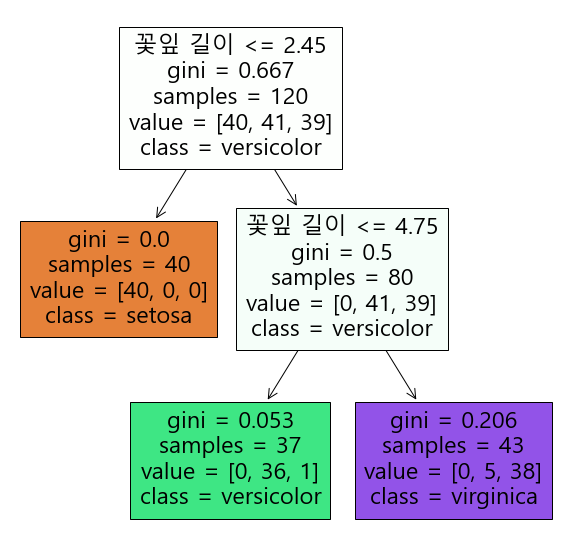

In [24]:
# 학습 결과 출력
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(10,10))
tree.plot_tree(DTmodel,
              feature_names=['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이'],
              class_names = ['setosa', 'versicolor', 'virginica'],
              filled=True)
plt.show()

In [25]:
# test data로 예측
pred_X = DTmodel.predict(test_X)
pred_X

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [29]:
# 데이터 불러오기
X,Y=load_breast_cancer(return_X_y=True)
X = np.array(X)
Y = np.array(Y)
print(X.shape, '\n', Y.shape, '\n')

(569, 30) 
 (569,) 



In [31]:
# 학습용 데이터, 평가용 데이터 분리
train_X,test_X,train_Y,test_Y = train_test_split(X,Y, test_size=0.2, random_state=42)
print(train_X.shape, '\n', test_X.shape, '\n')

(455, 30) 
 (114, 30) 



In [32]:
len(test_Y)-sum(test_Y) # class가 0인 데이터 개수

43

In [35]:
# 의사결정나무 모델 학습
DTmodel = DecisionTreeClassifier() # 객체 생성
DTmodel.fit(train_X, train_Y) # 학습

DecisionTreeClassifier()

In [37]:
# 예측
pred_Y = DTmodel.predict(test_X)

Confusion Matrix : 
 [[40  3]
 [ 4 67]]


[Text(0.5, 1.0, 'Confusion Matrix'),
 Text(25.0, 0.5, 'True label'),
 Text(0.5, 25.0, 'Predicted label')]

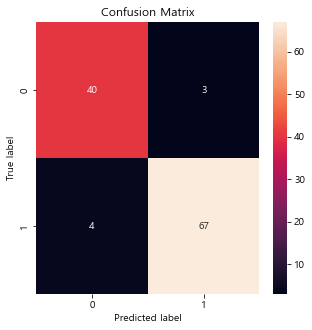

In [38]:
# 혼동행렬
cm = confusion_matrix(test_Y, pred_Y)
print('Confusion Matrix : \n {}'.format(cm))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True) # 데이터 표시하여 히트맵 그림
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')

In [41]:
# accuracy
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

cm_train = confusion_matrix(train_Y, y_pred_train)
cm_test = confusion_matrix(test_Y, y_pred_test)

print('train_X confusion_matrix : \n {}'.format(cm_train))
print('test_X confusion_matrix : \n {}'.format(cm_test))

acc_train = DTmodel.score(train_X, train_Y)
acc_test = DTmodel.score(test_X, test_Y)
acc_train2 = accuracy_score(train_Y, y_pred_train)
acc_test2 = accuracy_score(test_Y, y_pred_test)

print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))
print('train_X Accuracy: %f' % (acc_train2))
print('test_X Accuracy: %f' % (acc_test2))

train_X confusion_matrix : 
 [[169   0]
 [  0 286]]
test_X confusion_matrix : 
 [[40  3]
 [ 4 67]]
train_X Accuracy: 1.000000
test_X Accuracy: 0.938596
train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


In [44]:
# precision
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)

print('train_X precision: %f' % (precision_train))
print('test_X precision: %f' % (precision_test))

train_X precision: 1.000000
test_X precision: 0.957143


In [43]:
# recall
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)

print('train_X recall: %f' % (recall_train))
print('test_X recall: %f' % (recall_test))

train_X recall: 1.000000
test_X recall: 0.943662
